# Homework 3: Group 1

#### Abraham Alhomadi, Emily Blake, David Jung, Spencer Powell, Ryan Voges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv", sep=",")

In [3]:
# Listing and defining each variable in dataframe:

#ID: ID of each client
#LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#SEX: Gender (1=male, 2=female)
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
#AGE: Age in years
#PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
#PAY_2: Repayment status in August, 2005 (scale same as above)
#PAY_3: Repayment status in July, 2005 (scale same as above)
#PAY_4: Repayment status in June, 2005 (scale same as above)
#PAY_5: Repayment status in May, 2005 (scale same as above)
#PAY_6: Repayment status in April, 2005 (scale same as above)
#BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
#default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
# Take a first glance at our data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# We see that "ID" is just keeping count of observations, so we can drop this variable
df.drop(["ID"], axis=1, inplace=True)

In [7]:
df.head()
# We successfully removed "ID"

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
# Check for variables that need to be manipulated
for col in df.columns:
    print(col, df[col].nunique())

LIMIT_BAL 81
SEX 2
EDUCATION 7
MARRIAGE 4
AGE 56
PAY_0 11
PAY_2 11
PAY_3 11
PAY_4 11
PAY_5 10
PAY_6 10
BILL_AMT1 22723
BILL_AMT2 22346
BILL_AMT3 22026
BILL_AMT4 21548
BILL_AMT5 21010
BILL_AMT6 20604
PAY_AMT1 7943
PAY_AMT2 7899
PAY_AMT3 7518
PAY_AMT4 6937
PAY_AMT5 6897
PAY_AMT6 6939
default.payment.next.month 2


- We see that _sex_, _marriage_, _education_,_pay_, and _default.payment.next.month_ values all seem to have a low number of unique values.
- Let's change them to "category" Python types

In [9]:
categoricals = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default.payment.next.month"]

In [10]:
# Convert the floats and ints into categoricals
for col in categoricals:
    df[col]=df[col].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

In [12]:
# All dollar amounts are denominated in "NT", or New Taiwanese dollars. Let's change to an approximation of USD!
rate = 0.036
dollars = list(df.drop(["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default.payment.next.month", "AGE"], axis=1).columns)
for col in dollars:
    df[col] = df[col] * rate

In [13]:
# Let's see if it worked:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,720.0,2,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,24.804,0.0,0.0,0.000,0.000,1
1,4320.0,2,2,2,26,-1,2,0,0,0,...,117.792,124.380,117.396,0.000,36.000,36.0,36.0,0.000,72.000,1
2,3240.0,2,2,2,34,0,0,0,0,0,...,515.916,538.128,559.764,54.648,54.000,36.0,36.0,36.000,180.000,0
3,1800.0,2,2,1,37,0,0,0,0,0,...,1019.304,1042.524,1063.692,72.000,72.684,43.2,39.6,38.484,36.000,0
4,1800.0,1,2,1,57,-1,0,-1,0,0,...,753.840,689.256,688.716,72.000,1320.516,360.0,324.0,24.804,24.444,0


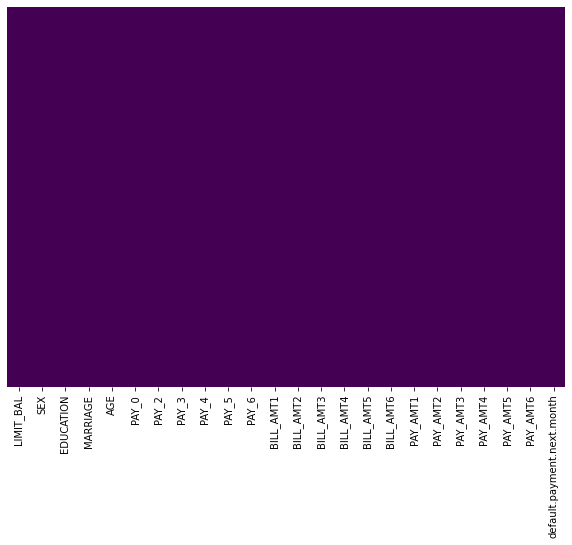

In [14]:
# Success! 
# Now look at "nan" values
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [15]:
# Look for missing or blank values
df.replace(' ', np.nan, inplace=True)
df.isnull().sum() / len(df)

LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

- Hooray! We have a very clean dataset

In [16]:
sum(df.duplicated())

35

In [17]:
# We have some duplicates, so let's drop them!
df.drop_duplicates(inplace=True)

In [18]:
sum(df.duplicated())

0

C:\Users\15597\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\15597\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


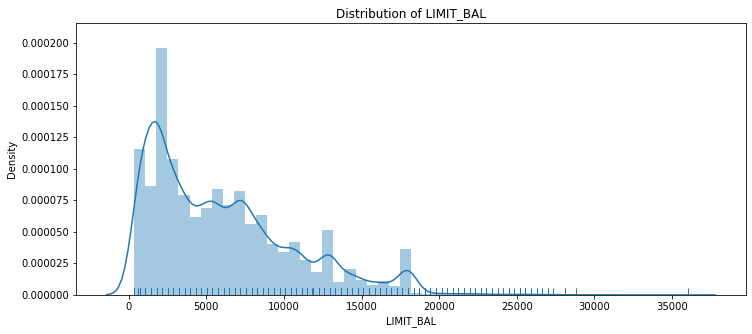

In [19]:
# Lets check out some distributions
plt.figure(figsize=(12,5))
sns.distplot(df["LIMIT_BAL"], 50, kde=True, rug=True)
plt.title('Distribution of LIMIT_BAL')
plt.show()

In [20]:
# Cut out the outlier(s):
df2=df[(df["LIMIT_BAL"] < 30000)].copy()
df2["LIMIT_BAL"].describe()

count    29964.000000
mean      6026.911910
std       4668.232625
min        360.000000
25%       1800.000000
50%       5040.000000
75%       8640.000000
max      28800.000000
Name: LIMIT_BAL, dtype: float64

C:\Users\15597\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\15597\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


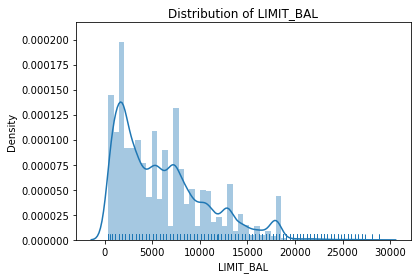

In [21]:
# Plot the new distribution
plt.figurdescribee=(12,5)
sns.distplot(df2["LIMIT_BAL"], 50, kde=True, rug=True)
plt.title('Distribution of LIMIT_BAL')
plt.show()

In [22]:
# Let's look at key data points for sex, education, and marriage:

df[['MARRIAGE', 'EDUCATION', 'SEX', 'AGE']].describe()

,AGE
count,29965.000000
mean,35.487969
std,9.219459
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


In [23]:
# Looking at bill statement description:

df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,1846.188352,1772.509187,1694.444978,1559.279876,1452.900038,1401.012442
std,2651.692767,2563.040426,2497.368684,2316.726517,2189.416702,2144.669319
min,-5960.880000,-2511.972000,-5661.504000,-6120.000000,-2928.024000,-12225.708000
25%,129.420000,108.360000,97.596000,84.960000,64.332000,45.432000
50%,807.768000,766.620000,724.860000,686.916000,652.680000,616.464000
75%,2421.360000,2307.924000,2167.236000,1965.636000,1808.892000,1773.072000
max,34722.396000,35421.516000,59907.204000,32097.096000,33378.156000,34619.904000


In [24]:
# Payment delay description:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()



,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29965,29965,29965,29965,29965,29965
unique,11,11,11,11,10,10
top,0,0,0,0,0,0
freq,14737,15730,15764,16455,16947,16286


In [25]:
# Let's look at limited balance stats to put some of our categorical variables in perspective:
df.LIMIT_BAL.describe()

# We could see that mean is $6027 and std is 4671. The range is 360-36000

count    29965.000000
mean      6027.912180
std       4671.364868
min        360.000000
25%       1800.000000
50%       5040.000000
75%       8640.000000
max      36000.000000
Name: LIMIT_BAL, dtype: float64

# Data Exploration

- From data count, we could glean the following:
- For Education, the majority of those surveyed fall in the graduate and university education level
- In the sample, the married represent largest group (15945) vs single (13643)
- There are more females than males in the sample
- About half of those surveyed fall between the age of 29 - 37

In [26]:
# Looking at cateogrical variables data count:

print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())
print(df.SEX.value_counts())
print(df.AGE.value_counts())




2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64
2    18091
1    11874
Name: SEX, dtype: int64
29    1602
27    1475
28    1406
30    1394
26    1252
31    1213
25    1185
34    1161
32    1157
33    1146
24    1126
35    1113
36    1107
37    1041
39     951
38     943
23     930
40     870
41     822
42     792
44     700
43     669
45     617
46     570
22     560
47     501
48     466
49     449
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64


In [27]:
# Changing default payment next month to just default:
df.rename(columns={'default.payment.next.month': 'default'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,720.0,2,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,24.804,0.0,0.0,0.000,0.000,1
1,4320.0,2,2,2,26,-1,2,0,0,0,...,117.792,124.380,117.396,0.000,36.000,36.0,36.0,0.000,72.000,1
2,3240.0,2,2,2,34,0,0,0,0,0,...,515.916,538.128,559.764,54.648,54.000,36.0,36.0,36.000,180.000,0
3,1800.0,2,2,1,37,0,0,0,0,0,...,1019.304,1042.524,1063.692,72.000,72.684,43.2,39.6,38.484,36.000,0
4,1800.0,1,2,1,57,-1,0,-1,0,0,...,753.840,689.256,688.716,72.000,1320.516,360.0,324.0,24.804,24.444,0


# Data visualization 

<AxesSubplot:>

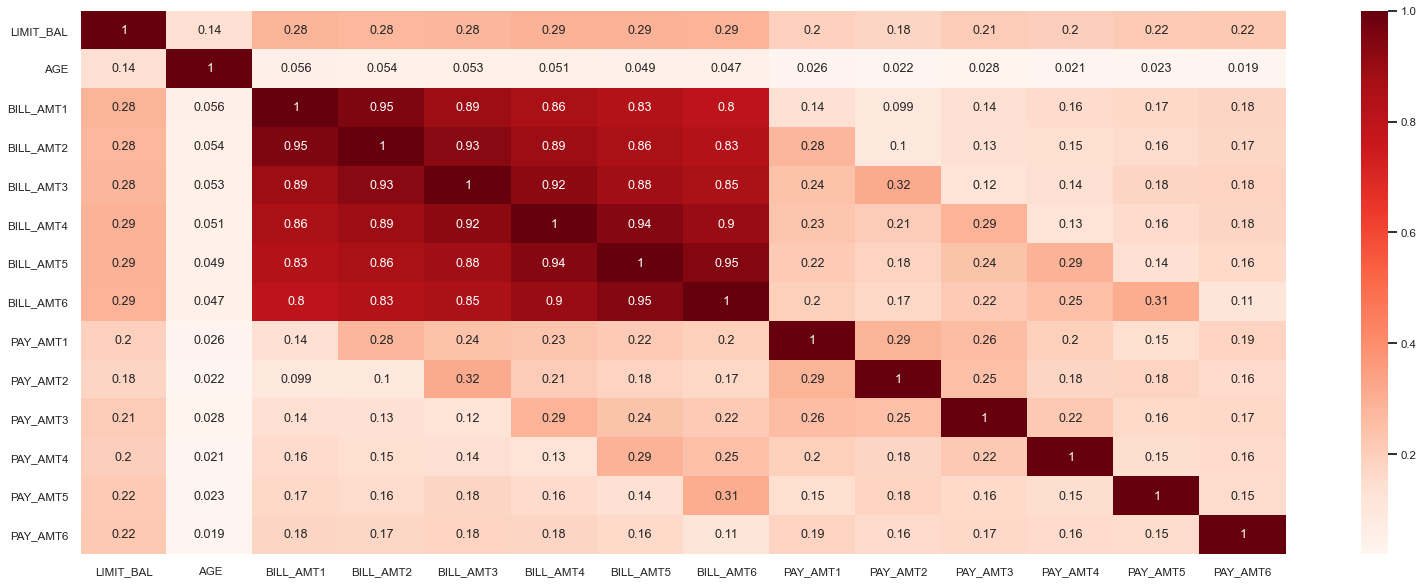

In [28]:
# Examining possible correlation between age and other variables:

sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
    
sns.heatmap(df2.iloc[:,:].corr(), cmap='Reds', annot=True)



In [29]:
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,720.0,2,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,24.804,0.0,0.0,0.000,0.000,1
1,4320.0,2,2,2,26,-1,2,0,0,0,...,117.792,124.380,117.396,0.000,36.000,36.0,36.0,0.000,72.000,1
2,3240.0,2,2,2,34,0,0,0,0,0,...,515.916,538.128,559.764,54.648,54.000,36.0,36.0,36.000,180.000,0
3,1800.0,2,2,1,37,0,0,0,0,0,...,1019.304,1042.524,1063.692,72.000,72.684,43.2,39.6,38.484,36.000,0
4,1800.0,1,2,1,57,-1,0,-1,0,0,...,753.840,689.256,688.716,72.000,1320.516,360.0,324.0,24.804,24.444,0


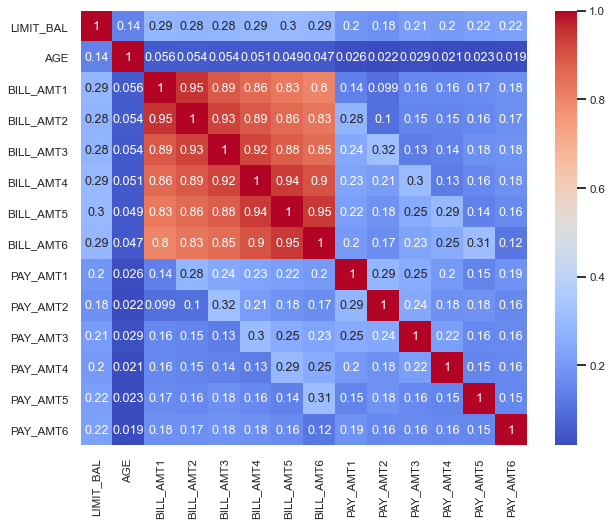

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()


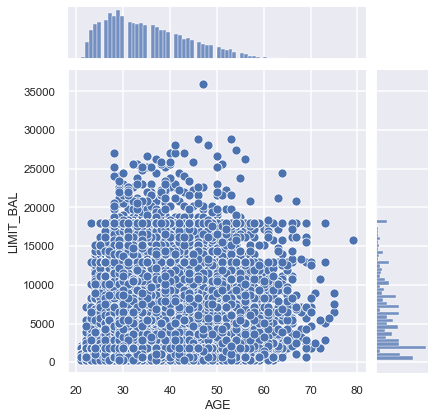

In [36]:
# looking at the relationship between age and credit limit: 

sns.jointplot(x='AGE', y='LIMIT_BAL',data=df)

# We could see that the data is bell shaped, because as age increases, limited balance increases, but it eventually starts
# to decrease after reaching a maximum point. As a person starts aging 50+, their limited balance starts to drop. 

<AxesSubplot:xlabel='default', ylabel='LIMIT_BAL'>

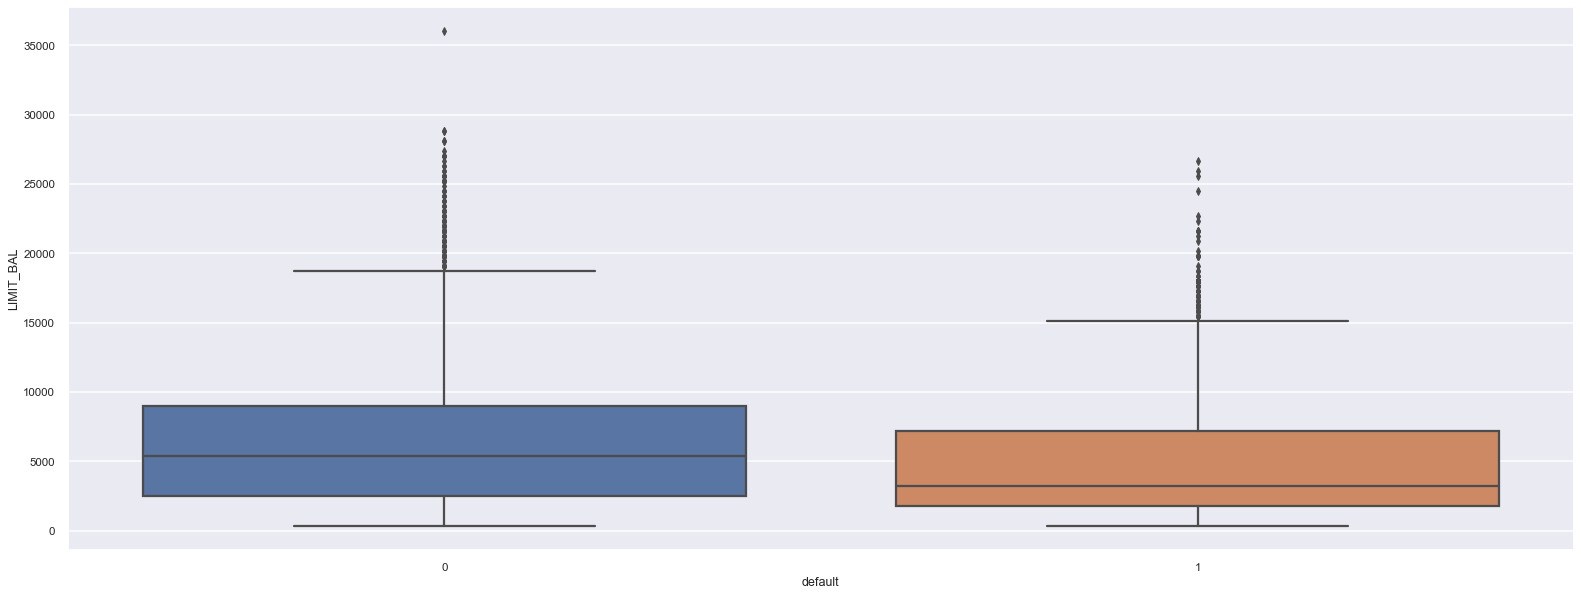

In [42]:
# Now will look at relationship between age and payment default:

sns.boxplot(x='default', y='LIMIT_BAL',data=df)

# The average limited balance defaulted on is approximately $2,500 and the max is $15,000. Those who did not default, their average limited balance
# is $5000 and have a higher limited balance (appox $18,000) 

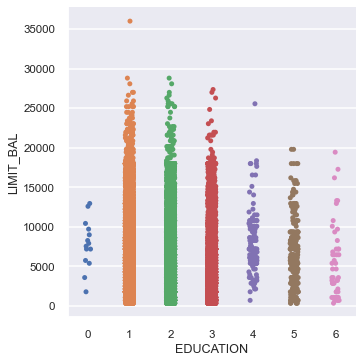

In [60]:
# Now, let's look at the relationship between education and credit limit:

print(sns.catplot(x='EDUCATION', y='LIMIT_BAL', data=df))

#  Glancing at the data, we could say that the higher an individual's education, the higher the credit limit, particuarly 
# if we compare grad and university level against high school education and below. 

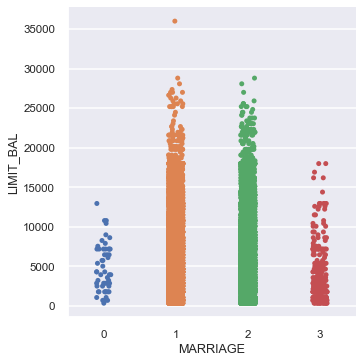

In [59]:
#Now, we are curious to see if marital status has an impact on credit limit:

print(sns.catplot(x='MARRIAGE', y='LIMIT_BAL', data=df))

# It is interesting to see that martial status does not necessarily have an impact on credit limit. Married (1) and single (2) 
# individuals have the same distribution as shown below. However, we do see there is a start credit limit between "others" vs.
# single and married individuals. 